# Metro-Bike-Share

Data Source: https://bikeshare.metro.net/about/data/

# Import Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import warnings

# Options and Settings

In [35]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [36]:
filepath = os.path.join('datasets', 'metro-trips-2021.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [37]:
df

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,151713183,17,1/1/2021 1:45,1/1/2021 2:02,3005,34.048500,-118.258537,4304,34.062580,-118.290092,5894,1,One Way,Walk-up,standard
1,151713983,7,1/1/2021 2:35,1/1/2021 2:42,4390,34.069271,-118.296593,4456,34.052429,-118.302017,16901,365,One Way,Annual Pass,electric
2,151716483,8,1/1/2021 4:28,1/1/2021 4:36,3052,34.051102,-118.264557,4314,34.057709,-118.279762,6005,30,One Way,Monthly Pass,standard
3,151721185,208,1/1/2021 4:43,1/1/2021 8:11,3034,34.042061,-118.263382,3031,34.044701,-118.252441,5852,1,One Way,Walk-up,standard
4,151720984,129,1/1/2021 5:53,1/1/2021 8:02,4446,34.053230,-118.278419,4446,34.053230,-118.278419,12075,1,Round Trip,Walk-up,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220992,179408277,19,12/31/2021 23:29,12/31/2021 23:48,3033,34.040989,-118.255798,3011,34.041130,-118.267982,14027,1,One Way,One Day Pass,standard
220993,179408276,8,12/31/2021 23:40,12/31/2021 23:48,3031,34.044701,-118.252441,3030,34.051941,-118.243530,20006,365,One Way,Annual Pass,standard
220994,179409877,43,12/31/2021 23:47,1/1/2022 0:30,3031,34.044701,-118.252441,3031,34.044701,-118.252441,16214,1,Round Trip,Walk-up,standard
220995,179409876,42,12/31/2021 23:48,1/1/2022 0:30,3031,34.044701,-118.252441,3031,34.044701,-118.252441,13336,1,Round Trip,Walk-up,standard


In [38]:
df.shape

(220997, 15)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220997 entries, 0 to 220996
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              220997 non-null  int64  
 1   duration             220997 non-null  int64  
 2   start_time           220997 non-null  object 
 3   end_time             220997 non-null  object 
 4   start_station        220997 non-null  int64  
 5   start_lat            220770 non-null  float64
 6   start_lon            220770 non-null  float64
 7   end_station          220997 non-null  int64  
 8   end_lat              215391 non-null  float64
 9   end_lon              215391 non-null  float64
 10  bike_id              220997 non-null  object 
 11  plan_duration        220997 non-null  int64  
 12  trip_route_category  220997 non-null  object 
 13  passholder_type      220996 non-null  object 
 14  bike_type            220997 non-null  object 
dtypes: float64(4), in

In [40]:
df[['start_time', 'end_time']] = df[['start_time', 'end_time']].apply(pd.to_datetime)   # convert dates to pandas datetime

In [41]:
df['day_name'] = df['start_time'].dt.day_name()                                         # add day name    

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220997 entries, 0 to 220996
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   trip_id              220997 non-null  int64         
 1   duration             220997 non-null  int64         
 2   start_time           220997 non-null  datetime64[ns]
 3   end_time             220997 non-null  datetime64[ns]
 4   start_station        220997 non-null  int64         
 5   start_lat            220770 non-null  float64       
 6   start_lon            220770 non-null  float64       
 7   end_station          220997 non-null  int64         
 8   end_lat              215391 non-null  float64       
 9   end_lon              215391 non-null  float64       
 10  bike_id              220997 non-null  object        
 11  plan_duration        220997 non-null  int64         
 12  trip_route_category  220997 non-null  object        
 13  passholder_typ

# Missing Data Exploration

In [43]:
df.isna().sum()                                               # less than 1% missing data in (longitute and latitude) columns

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station             0
start_lat               227
start_lon               227
end_station               0
end_lat                5606
end_lon                5606
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           1
bike_type                 0
day_name                  0
dtype: int64

In [44]:
df_drop = df.dropna()                                           # drop missing values
df_drop.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,day_name
0,151713183,17,2021-01-01 01:45:00,2021-01-01 02:02:00,3005,34.048500,-118.258537,4304,34.062580,-118.290092,5894,1,One Way,Walk-up,standard,Friday
1,151713983,7,2021-01-01 02:35:00,2021-01-01 02:42:00,4390,34.069271,-118.296593,4456,34.052429,-118.302017,16901,365,One Way,Annual Pass,electric,Friday
2,151716483,8,2021-01-01 04:28:00,2021-01-01 04:36:00,3052,34.051102,-118.264557,4314,34.057709,-118.279762,6005,30,One Way,Monthly Pass,standard,Friday
3,151721185,208,2021-01-01 04:43:00,2021-01-01 08:11:00,3034,34.042061,-118.263382,3031,34.044701,-118.252441,5852,1,One Way,Walk-up,standard,Friday
4,151720984,129,2021-01-01 05:53:00,2021-01-01 08:02:00,4446,34.053230,-118.278419,4446,34.053230,-118.278419,12075,1,Round Trip,Walk-up,standard,Friday


In [45]:
df_drop.isna().sum()

trip_id                0
duration               0
start_time             0
end_time               0
start_station          0
start_lat              0
start_lon              0
end_station            0
end_lat                0
end_lon                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
bike_type              0
day_name               0
dtype: int64

In [46]:
df_drop.describe(include='object')

,bike_id,trip_route_category,passholder_type,bike_type,day_name
count,215242,215242,215242,215242,215242
unique,3095,2,5,3,7
top,17174,One Way,Monthly Pass,standard,Saturday
freq,758,165780,101397,161299,36860


In [47]:
df_drop['bike_id'].value_counts()

17174    758
16600    736
19112    627
16914    624
16992    623
        ... 
14054      1
15941      1
13700      1
13420      1
15244      1
Name: bike_id, Length: 3095, dtype: int64

# Exploratory Data Analysis

In [48]:
from matplotlib.ticker import FuncFormatter

# helper function to format y-axis
def thousand(x, pos):
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)

# helper function for plotting bar charts
def plot_bar(x, y, hue=None, df=None, xlabel=None, ylabel=None, title=None, ci=None, ax=None):
    fig, ax = plt.subplots()
    sns.barplot(x=x, y=y, hue=hue, data=df, ci=ci, ax=ax)
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    ax.yaxis.set_major_formatter(format_tsd)

    return plot_bar


# helper function to plot pie charts
def plot_pie(series, label, shadow=None, startangle=None):
    fig1, ax1 = plt.subplots()
    ax1.pie(x=series.value_counts(normalize=True).values, labels=label.value_counts(normalize=True).keys(), 
            autopct='%1.1f%%', shadow=shadow, startangle=startangle)
    ax1.axis('equal')
    
    return plot_pie

"Round Trip" for trips starting and ending at the same station or "One Way" for all other trips

In [49]:
df_drop['trip_route_category'].value_counts()                               # count

One Way       165780
Round Trip     49462
Name: trip_route_category, dtype: int64

<function __main__.plot_bar(x, y, hue=None, df=None, xlabel=None, ylabel=None, title=None, ci=None, ax=None)>

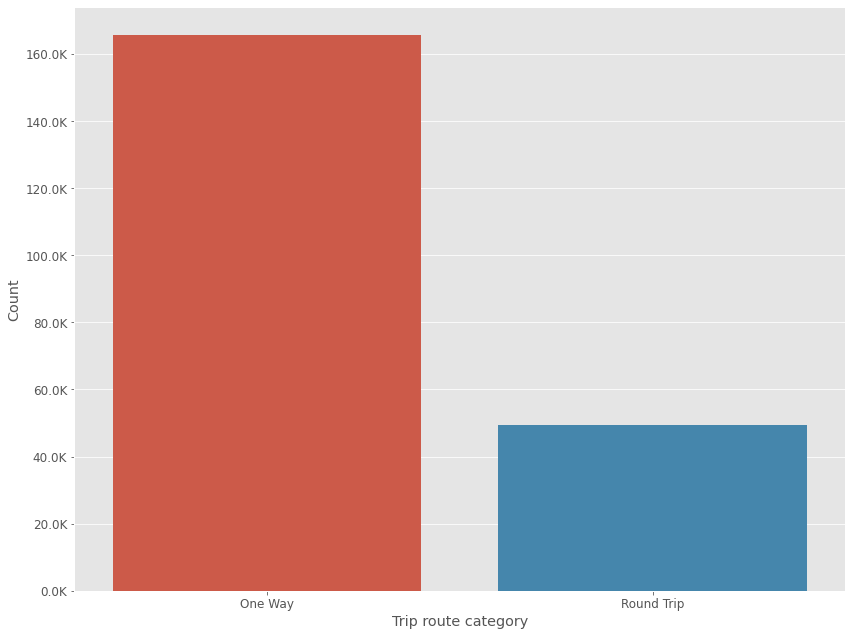

In [50]:
plot_bar(x=df_drop['trip_route_category'].value_counts().keys(), y=df_drop['trip_route_category'].value_counts().values,
         xlabel='Trip route category', ylabel='Count')

In [51]:
df_drop['trip_route_category'].value_counts(normalize=True)         # proportions

One Way       0.770203
Round Trip    0.229797
Name: trip_route_category, dtype: float64

<function __main__.plot_pie(series, label, shadow=None, startangle=None)>

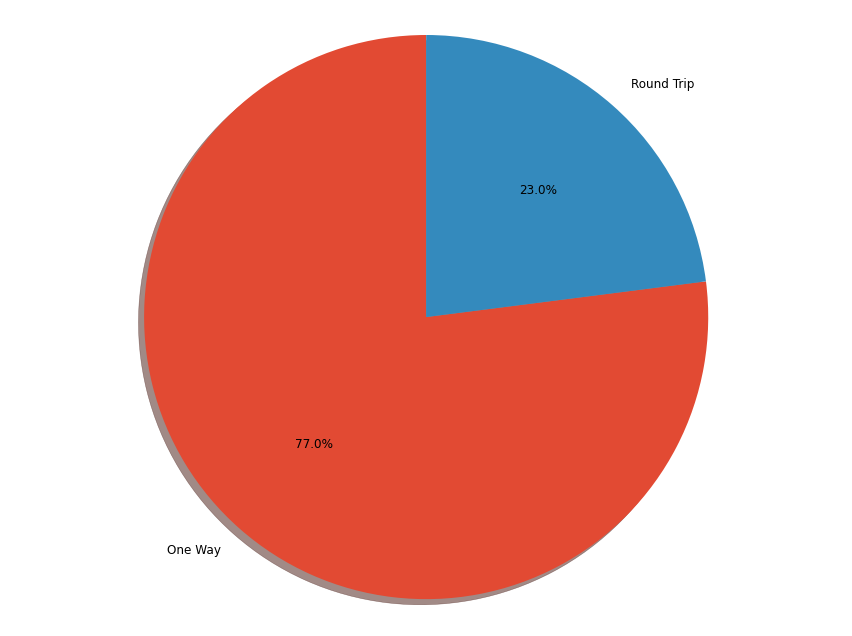

In [52]:
plot_pie(series=df_drop['trip_route_category'], label=df_drop['trip_route_category'], shadow=True, startangle=90)

The name of the passholder's plan

In [53]:
df_drop['passholder_type'].value_counts()                           # count

Monthly Pass    101397
Walk-up          67435
One Day Pass     25663
Annual Pass      20746
Testing              1
Name: passholder_type, dtype: int64

<function __main__.plot_bar(x, y, hue=None, df=None, xlabel=None, ylabel=None, title=None, ci=None, ax=None)>

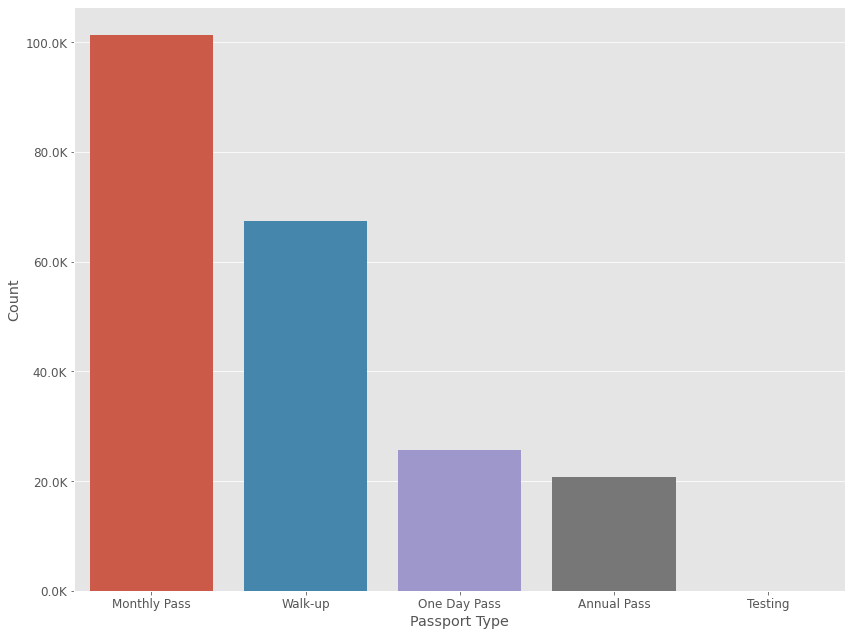

In [54]:
plot_bar(x=df_drop['passholder_type'].value_counts().keys(), y=df_drop['passholder_type'].value_counts().values,
         xlabel='Passport Type', ylabel='Count')

In [55]:
df_drop['passholder_type'].value_counts(normalize=True)             # proportions

Monthly Pass    0.471084
Walk-up         0.313299
One Day Pass    0.119229
Annual Pass     0.096385
Testing         0.000005
Name: passholder_type, dtype: float64

<function __main__.plot_pie(series, label, shadow=None, startangle=None)>

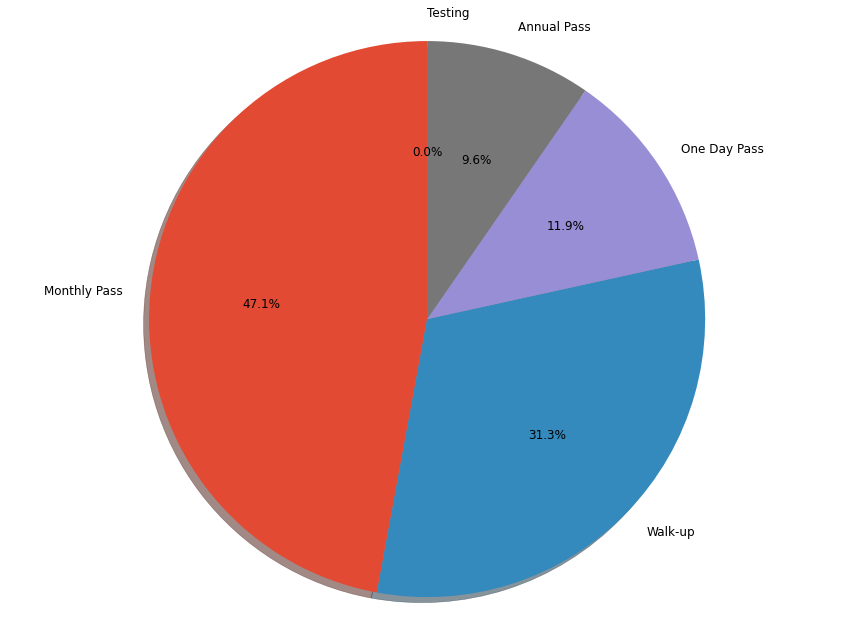

In [56]:
plot_pie(series=df_drop['passholder_type'], label=df_drop['passholder_type'], shadow=True, startangle=90)

The kind of bike used on the trip, including standard pedal-powered bikes, electric assist bikes, or smart bikes

In [57]:
df_drop['bike_type'].value_counts()

standard    161299
electric     52225
smart         1718
Name: bike_type, dtype: int64

<function __main__.plot_bar(x, y, hue=None, df=None, xlabel=None, ylabel=None, title=None, ci=None, ax=None)>

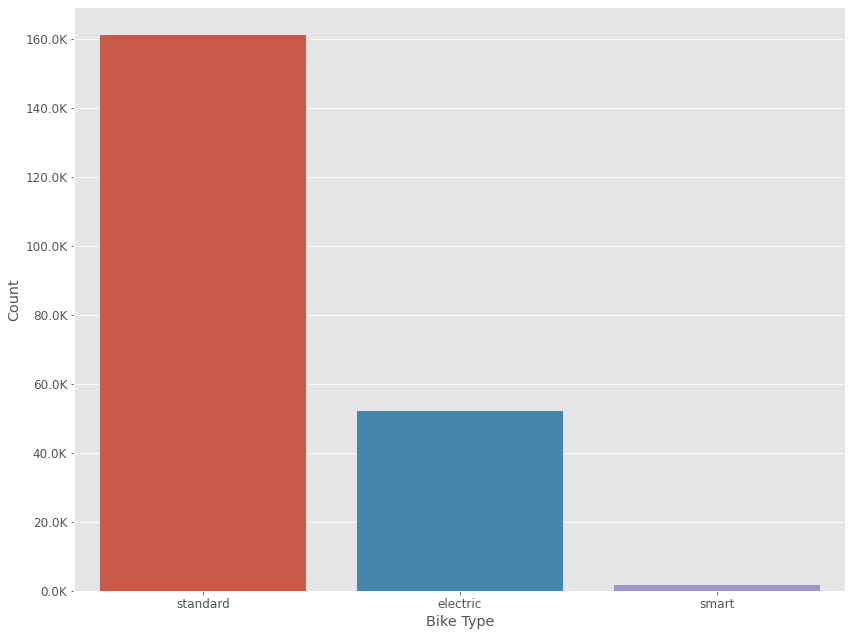

In [58]:
plot_bar(x=df_drop['bike_type'].value_counts().keys(), y=df_drop['bike_type'].value_counts().values,
         xlabel='Bike Type', ylabel='Count')

In [59]:
df_drop['bike_type'].value_counts(normalize=True)

standard    0.749384
electric    0.242634
smart       0.007982
Name: bike_type, dtype: float64

<function __main__.plot_pie(series, label, shadow=None, startangle=None)>

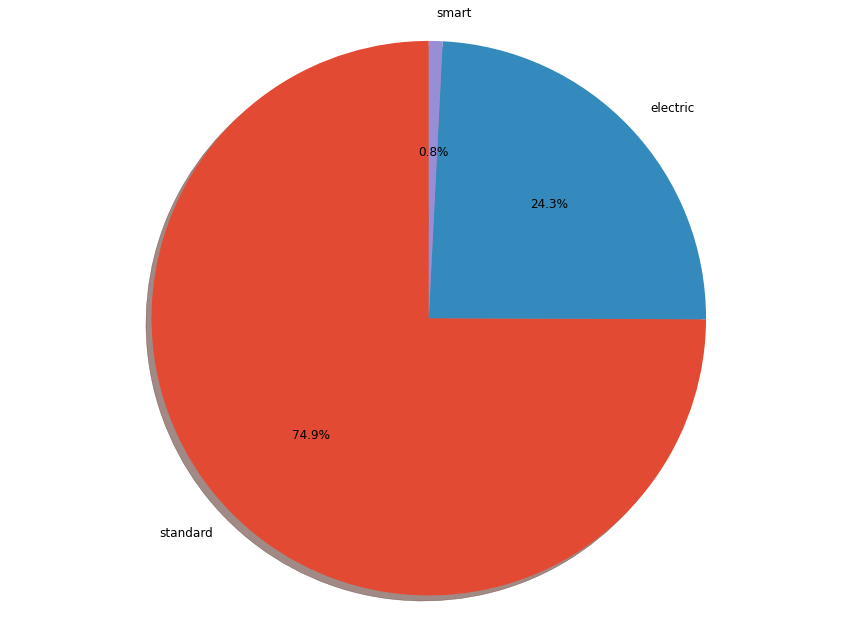

In [60]:
plot_pie(series=df_drop['bike_type'], label=df_drop['bike_type'], shadow=True, startangle=90)

In [61]:
df_drop['day_name'].value_counts()

Saturday     36860
Sunday       35966
Friday       31298
Thursday     28488
Tuesday      28165
Wednesday    27997
Monday       26468
Name: day_name, dtype: int64

<function __main__.plot_bar(x, y, hue=None, df=None, xlabel=None, ylabel=None, title=None, ci=None, ax=None)>

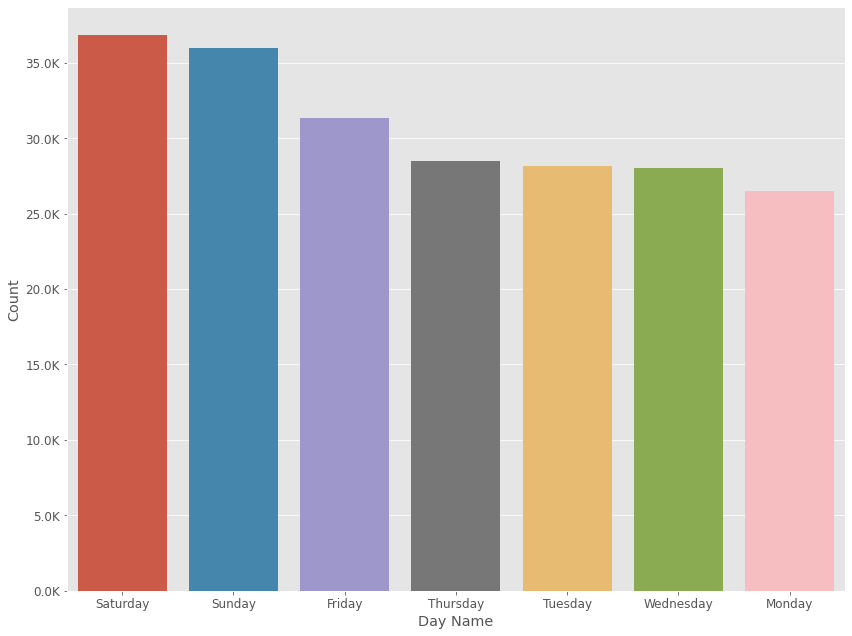

In [62]:
plot_bar(x=df_drop['day_name'].value_counts().keys(), y=df_drop['day_name'].value_counts().values,
         xlabel='Day Name', ylabel='Count')

In [63]:
df_drop['day_name'].value_counts(normalize=True)

Saturday     0.171249
Sunday       0.167096
Friday       0.145408
Thursday     0.132353
Tuesday      0.130853
Wednesday    0.130072
Monday       0.122969
Name: day_name, dtype: float64

<function __main__.plot_pie(series, label, shadow=None, startangle=None)>

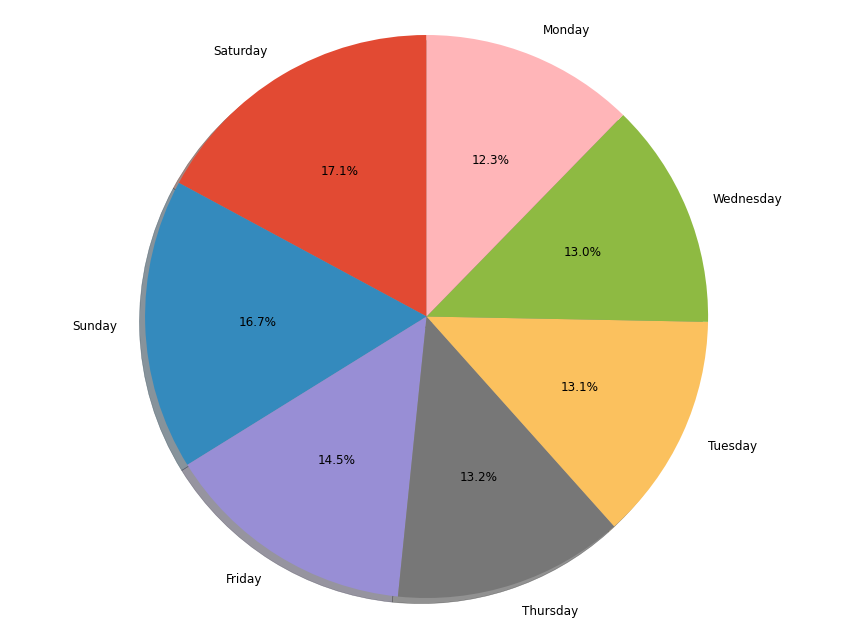

In [64]:
plot_pie(series=df_drop['day_name'], label=df_drop['day_name'], shadow=True, startangle=90)

In [65]:
df_drop['duration'].describe()

count    215242.000000
mean         40.369705
std          99.009098
min           1.000000
25%           9.000000
50%          19.000000
75%          35.000000
max        1440.000000
Name: duration, dtype: float64

In [66]:
df_drop.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,day_name
0,151713183,17,2021-01-01 01:45:00,2021-01-01 02:02:00,3005,34.048500,-118.258537,4304,34.062580,-118.290092,5894,1,One Way,Walk-up,standard,Friday
1,151713983,7,2021-01-01 02:35:00,2021-01-01 02:42:00,4390,34.069271,-118.296593,4456,34.052429,-118.302017,16901,365,One Way,Annual Pass,electric,Friday
2,151716483,8,2021-01-01 04:28:00,2021-01-01 04:36:00,3052,34.051102,-118.264557,4314,34.057709,-118.279762,6005,30,One Way,Monthly Pass,standard,Friday
3,151721185,208,2021-01-01 04:43:00,2021-01-01 08:11:00,3034,34.042061,-118.263382,3031,34.044701,-118.252441,5852,1,One Way,Walk-up,standard,Friday
4,151720984,129,2021-01-01 05:53:00,2021-01-01 08:02:00,4446,34.053230,-118.278419,4446,34.053230,-118.278419,12075,1,Round Trip,Walk-up,standard,Friday
